# The Brusselator

$$
\begin{align}
\frac{\partial u}{\partial t} &= \nabla^2u + a - (b-1)u + u^2v\\
\frac{\partial v}{\partial t} &= D\nabla^2v + bu - u^2v
\end{align}
$$

In [3]:
# Parameters
const D = 20
const a = 2
const b = 3;

In [100]:
L = 25  # domain length
n =  500 # number of grid points
Δx = L/n
Δx² = Δx^2
x_discrete = range(0, L, n);

In [91]:
# reaction kinetics
f(u, v) = a - (b + 1)*u + u^2*v
g(u, v) = b*u - u^2*v;

In [92]:
u₀ = a .+ 1e-6rand(n)
v₀ = b/a .+ 1e-6rand(n)
U₀ = hcat(u₀, v₀);

In [140]:
function rhs!(dU, U, params, t)
    n, Δx² = params
    @inbounds begin
        for i in 1:2
            dU[1, i] = 2*(U[2, i] - U[1, i]) / Δx²
            dU[end, i] = 2*(-U[end, i] + U[end - 1, i]) / Δx²
            for j in 2:(n - 1)
                dU[j, i] = (U[j+1, i] - 2*U[j,i] + U[j-1, i]) / Δx²
            end
        end
        dU[:, 2] *= D
    end
    return nothing
end

function nl_rhs!(dU, U, params, t)
    u = @view U[:, 1]
    v = @view U[:, 2]
    dU[:, 1] .= f.(u, v)
    dU[:, 2] .= g.(u, v)
    return nothing
end;

In [133]:
using OrdinaryDiffEq: SplitODEProblem, solve, SBDF2, Tsit5, KenCarp4

t_span = (0, 200)
prob = SplitODEProblem(rhs!, nl_rhs!, U₀, t_span, (n, Δx²));

In [134]:
sol = solve(prob, KenCarp4(), reltol=1e-6);

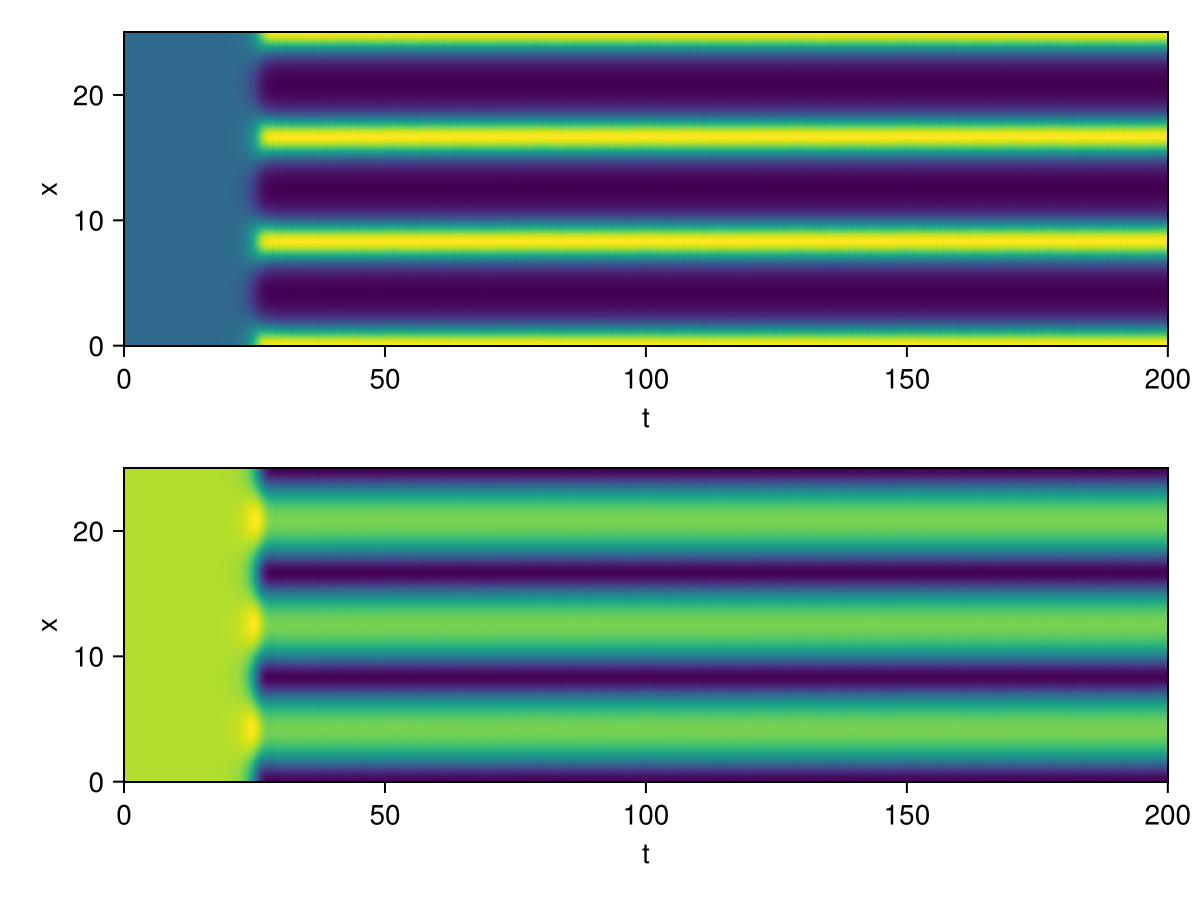

In [145]:
using CairoMakie

fig = Figure()
ax = Axis(fig[1, 1],
    xlabel = "t",
    ylabel = "x",
)

heatmap!(ax, sol.t, x_discrete, sol[:, 1, :]')

ax = Axis(fig[2, 1],
    xlabel = "t",
    ylabel = "x",
)
heatmap!(ax, sol.t, x_discrete, sol[:, 2, :]')
fig